### **Library**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

### **Retrieval Data**

Data ini data yang telah dilakukan Preprocessing
- Tokenisasi
- Case Folding
- Stemming
- lemmatisasi

In [79]:
df = pd.read_csv("processed_comments.csv")
df

,text_cleaned
0,nangkep bjorka ngakak guling kalo maling ayam ...
1,mas nya ini masa juga g bisa mendeteksi bjorka...
2,kek udah tenang gtu kan gak viral si bjorka eh...
3,kalo ngobrol shootnya dua2nya akan lebih dinik...
4,passwd admin1234
...,...
1995,aku dari awal berminat untuk diretas mau giman...
1996,polisi aneh emang
1997,undung bahlur dong om gimana minyak di sell da...
1998,ketawa aja karna dari tubuh polri katanya ada ...


### **Labelling**

In [80]:
df['label'] = None # membuat kolom label dengan isi "None" yang masih kosong
df # menampilkan dataframe

,text_cleaned,label
0,nangkep bjorka ngakak guling kalo maling ayam ...,None
1,mas nya ini masa juga g bisa mendeteksi bjorka...,None
2,kek udah tenang gtu kan gak viral si bjorka eh...,None
3,kalo ngobrol shootnya dua2nya akan lebih dinik...,None
4,passwd admin1234,None
...,...,...
1995,aku dari awal berminat untuk diretas mau giman...,None
1996,polisi aneh emang,None
1997,undung bahlur dong om gimana minyak di sell da...,None
1998,ketawa aja karna dari tubuh polri katanya ada ...,None


#### Labeling manual = Labeling 0 sampai 499 data

Data ini merupakan data yang dipisah sebanyak 2 bagian sebagai pelabelan data manual yang akan dijadikan sebagai pelatihan

In [81]:
label = pd.read_csv("manual_label.csv") # import data
label # menampilkan data

,Unnamed: 0,text_cleaned,label
0,0,nangkep bjorka ngakak guling kalo maling ayam ...,negatif
1,1,mas nya ini masa juga g bisa mendeteksi bjorka...,negatif
2,2,kek udah tenang gtu kan gak viral si bjorka eh...,negatif
3,3,kalo ngobrol shootnya dua2nya akan lebih dinik...,netral
4,4,passwd admin1234,netral
...,...,...,...
495,495,sixtyshop software nya orang kalimantan yang b...,netral
496,496,gw sering dimasukin grup wa dikasih tugas bebe...,netral
497,497,terus yg di tangkep siapa,netral
498,498,terus yang ketangkep siapa bjirrrka,netral


In [82]:
label.drop(columns=['Unnamed: 0'], inplace=True) # menghapus data yang tidak dibutuhkan
label

,text_cleaned,label
0,nangkep bjorka ngakak guling kalo maling ayam ...,negatif
1,mas nya ini masa juga g bisa mendeteksi bjorka...,negatif
2,kek udah tenang gtu kan gak viral si bjorka eh...,negatif
3,kalo ngobrol shootnya dua2nya akan lebih dinik...,netral
4,passwd admin1234,netral
...,...,...
495,sixtyshop software nya orang kalimantan yang b...,netral
496,gw sering dimasukin grup wa dikasih tugas bebe...,netral
497,terus yg di tangkep siapa,netral
498,terus yang ketangkep siapa bjirrrka,netral


In [83]:
manual_label = label # mengganti nama variabel agar tidak tertukar dengan data selanjutnya (self-label)
manual_label

,text_cleaned,label
0,nangkep bjorka ngakak guling kalo maling ayam ...,negatif
1,mas nya ini masa juga g bisa mendeteksi bjorka...,negatif
2,kek udah tenang gtu kan gak viral si bjorka eh...,negatif
3,kalo ngobrol shootnya dua2nya akan lebih dinik...,netral
4,passwd admin1234,netral
...,...,...
495,sixtyshop software nya orang kalimantan yang b...,netral
496,gw sering dimasukin grup wa dikasih tugas bebe...,netral
497,terus yg di tangkep siapa,netral
498,terus yang ketangkep siapa bjirrrka,netral


#### Visualisasi Manual Label

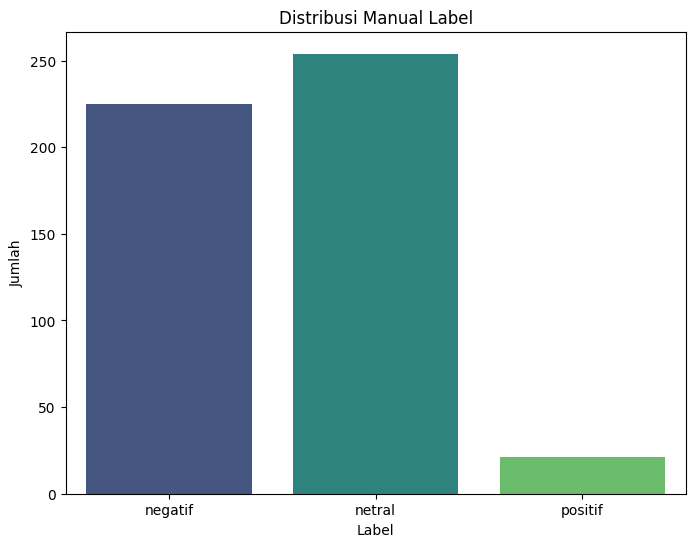

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(data=manual_label, x='label', hue='label', palette='viridis', legend=False)
plt.title('Distribusi Manual Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

#### Self Label = Labeling 500 sampai 2000 data

Data ini merupakan data yang dipisah sebanyak 1500 bagian sebagai pelabelan data self-training  

In [85]:
sl = pd.read_csv("self_label_mentah.csv") # import sisa data dari 500 - 1999
sl

,Unnamed: 0,text_cleaned,label
0,500,rakyat kalau pakai baju bjorka pasti ditangkap...,NaN
1,501,1 kata intel gak akan ngaku klo dia sama seper...,NaN
2,502,nih org2 pemerintah tuh masih berfikir rakyatn...,NaN
3,503,ini serius gaada yg bela polisi komen isinya m...,NaN
4,504,jadi kaya pilem the accoutant 1 ama 2,NaN
...,...,...,...
1495,1995,aku dari awal berminat untuk diretas mau giman...,NaN
1496,1996,polisi aneh emang,NaN
1497,1997,undung bahlur dong om gimana minyak di sell da...,NaN
1498,1998,ketawa aja karna dari tubuh polri katanya ada ...,NaN


In [86]:
sl.drop(columns=['Unnamed: 0'], inplace=True) # menghapus kolom yang tidak dibutuhkan
sl

,text_cleaned,label
0,rakyat kalau pakai baju bjorka pasti ditangkap...,NaN
1,1 kata intel gak akan ngaku klo dia sama seper...,NaN
2,nih org2 pemerintah tuh masih berfikir rakyatn...,NaN
3,ini serius gaada yg bela polisi komen isinya m...,NaN
4,jadi kaya pilem the accoutant 1 ama 2,NaN
...,...,...
1495,aku dari awal berminat untuk diretas mau giman...,NaN
1496,polisi aneh emang,NaN
1497,undung bahlur dong om gimana minyak di sell da...,NaN
1498,ketawa aja karna dari tubuh polri katanya ada ...,NaN


In [87]:
# 1. TF-IDF Vectorization Untuk Training Data
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # mengubah teks menjadi representasi numerik (vektor) yang dapat dipahami oleh model machine learning.

X_train_features = tfidf_vectorizer.fit_transform(manual_label['text_cleaned'].fillna('')) #engisi nilai-nilai yang hilang (NaN) di kolom teks dengan string kosong, mencegah kesalahan selama proses vektorisasi.
y_train_labels = manual_label['label'] # target atau label yang akan dipelajari oleh model.

print("TF-IDF vectorization untuk manual_label selesai.")

TF-IDF vectorization untuk manual_label selesai.


In [88]:
# 2. Model Training
model = LogisticRegression(max_iter=1000) # algoritma yang sering digunakan untuk tugas klasifikasi biner dan multikelas.
model.fit(X_train_features, y_train_labels) # Melatih model LogisticRegression menggunakan fitur X_train_features dan label y_train_labels

print("Logistic Regression Model Pelatihan sukses di manual_label.")

Logistic Regression Model Pelatihan sukses di manual_label.


In [89]:
# 3. TF-IDF Vectorization Untuk Self-Labeling Data
sl_copy = sl.copy()
sl_copy['text_cleaned'] = sl_copy['text_cleaned'].fillna('') # mengganti semua nilai NaN yang ditemukan di kolom tersebut dengan string kosong (''). Ini penting karena TfidfVectorizer (dan banyak alat pemrosesan teks lainnya) mengharapkan masukan berupa string dan akan gagal jika menemukan nilai NaN.

X_self_label_features = tfidf_vectorizer.transform(sl_copy['text_cleaned'])

print("TF-IDF vectorization untuk sl data selesai.")

TF-IDF vectorization untuk sl data selesai.


In [90]:
# 4. Prediksi Model
predicted_labels = model.predict(X_self_label_features)

In [91]:
# 5. Mengisi Hasi Prediksi Model
sl_copy['label'] = predicted_labels
sl = sl_copy # Update the original sl reference

print("Self-labeling for sl complete. Displaying head of updated sl DataFrame:")
display(sl)

Self-labeling for sl complete. Displaying head of updated sl DataFrame:


,text_cleaned,label
0,rakyat kalau pakai baju bjorka pasti ditangkap...,negatif
1,1 kata intel gak akan ngaku klo dia sama seper...,netral
2,nih org2 pemerintah tuh masih berfikir rakyatn...,negatif
3,ini serius gaada yg bela polisi komen isinya m...,negatif
4,jadi kaya pilem the accoutant 1 ama 2,netral
...,...,...
1495,aku dari awal berminat untuk diretas mau giman...,negatif
1496,polisi aneh emang,negatif
1497,undung bahlur dong om gimana minyak di sell da...,netral
1498,ketawa aja karna dari tubuh polri katanya ada ...,negatif


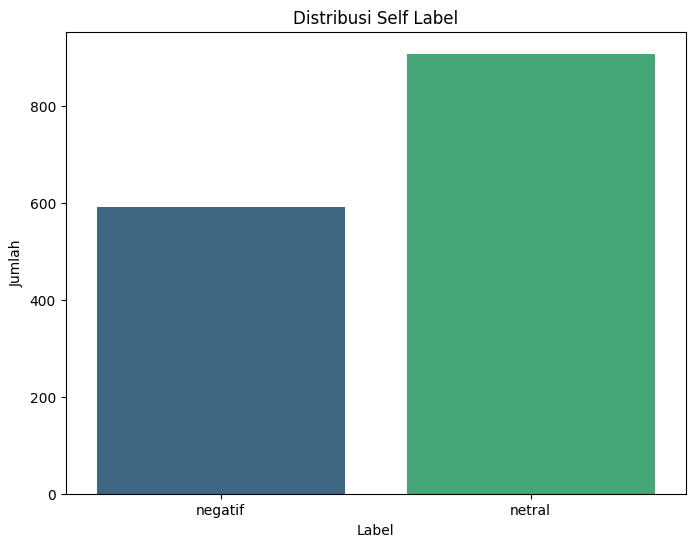

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sl, x='label', hue='label', palette='viridis', legend=False)
plt.title('Distribusi Self Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()